In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/kaggle/input/spam-vs-ham/spam.csv', encoding='latin-1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.rename(columns={'v1': 'type', 'v2': 'mail'}, inplace=True)

In [7]:
df.head()

,type,mail,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.head()

,type,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [11]:
df.isnull().sum()

type    0
mail    0
dtype: int64

In [12]:
df.type.value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

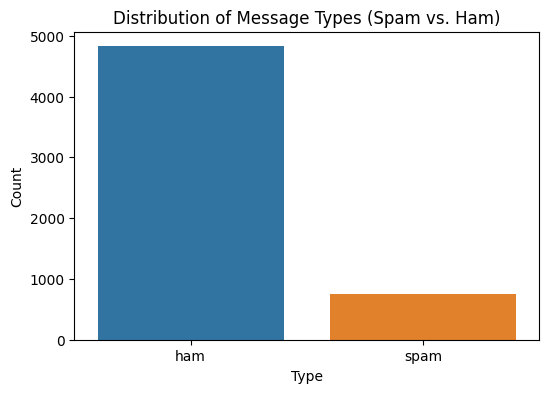

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df)
plt.title('Distribution of Message Types (Spam vs. Ham)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

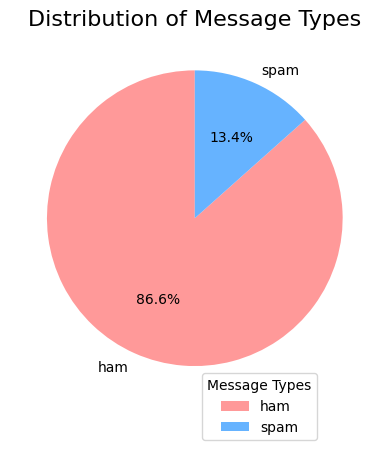

In [14]:
type_counts = df['type'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plotting a pie chart to visualize the distribution of message types
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Adding a legend with custom colors and labels
plt.legend(labels=type_counts.index, loc="best", bbox_to_anchor=(0.85, 0.1), title="Message Types", fontsize='medium')

# Adding a title to the plot
plt.title('Distribution of Message Types', fontsize=16)

# Displaying the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


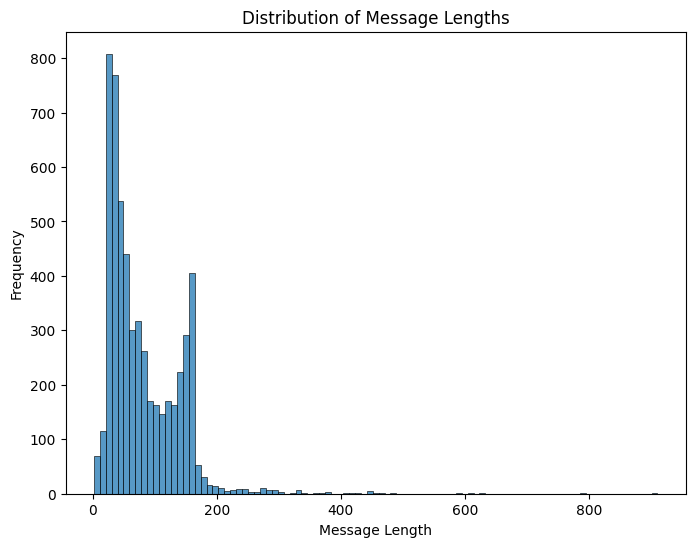

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mail'].apply(len))
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

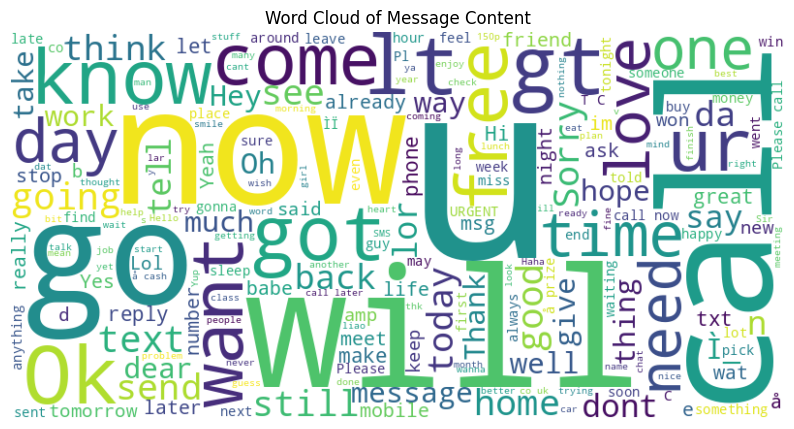

In [16]:
from wordcloud import WordCloud

# Join all messages into a single string
all_messages = ' '.join(df['mail'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Message Content')
plt.axis('off')
plt.show()

In [17]:
df.describe()

,type,mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
df.duplicated().sum()

403

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(5169, 2)

In [21]:
df.head()

,type,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.columns

Index(['type', 'mail'], dtype='object')

In [23]:
training_size= 4000

#splitting the mails
training_mails=df['mail'][:training_size]
testing_mails= df['mail'][training_size:]

#splitting the labels (types)
training_labels= df['type'][:training_size]
testing_labels=  df['type'][training_size:]

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

training_labels_encoded= label_encoder.fit_transform(training_labels)
testing_labels_encoded= label_encoder.transform(testing_labels)


In [25]:
print(f'training mails: {len(training_mails)}')
print(f'testing mails: {len(testing_mails)}')
print(f'training labels: {len(training_labels)}')
print(f'testing labels: {len(testing_labels)}')

training mails: 4000
testing mails: 1169
training labels: 4000
testing labels: 1169


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2024-05-31 21:25:09.391604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 21:25:09.391987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 21:25:09.569795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
vocab_size= 10000
max_length= 120
trunc_type= 'post'
padding_type= 'post'
oov_tok= '<OOV>'

In [28]:
tokenizer= Tokenizer(num_words=vocab_size, oov_token= oov_tok)

In [29]:
tokenizer.fit_on_texts(training_mails)
word_index= tokenizer.word_index

In [30]:
training_sequences= tokenizer.texts_to_sequences(training_mails)
training_padded= pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [31]:
testing_sequences= tokenizer.texts_to_sequences(testing_mails)
testing_padded= pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type, )

In [32]:
training_labels= np.array(training_labels_encoded)
testing_labels= np.array(testing_labels_encoded)

In [33]:
embedding_dim= 16
lstm_dim= 32
dense_dim= 24

In [34]:
model= tf.keras.Sequential([    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer= 'adam',
    metrics= ['accuracy']
)

In [36]:
model.build(input_shape=(None, max_length))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,129 (680.19 KB)

 Trainable params: 174,129 (680.19 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
num_epochs=10

history= model.fit(
    training_padded,
    training_labels_encoded,
    epochs= num_epochs,
    validation_data=(testing_padded, testing_labels_encoded)
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8215 - loss: 0.4714 - val_accuracy: 0.9658 - val_loss: 0.1239
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9758 - loss: 0.1012 - val_accuracy: 0.9863 - val_loss: 0.0489
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9882 - loss: 0.0439 - val_accuracy: 0.9863 - val_loss: 0.0570
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9934 - loss: 0.0268 - val_accuracy: 0.9812 - val_loss: 0.0841
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9971 - loss: 0.0129 - val_accuracy: 0.9872 - val_loss: 0.0511
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9999 - loss: 0.0030 - val_accuracy: 0.9897 - val_loss: 0.0491
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9855 - val_loss: 0.0598
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9997 - loss: 0.0018 - val_

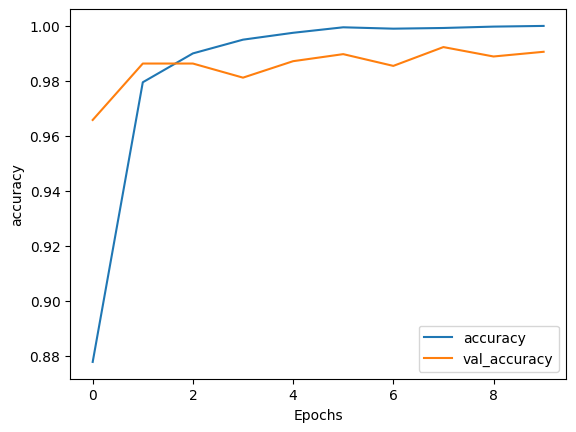

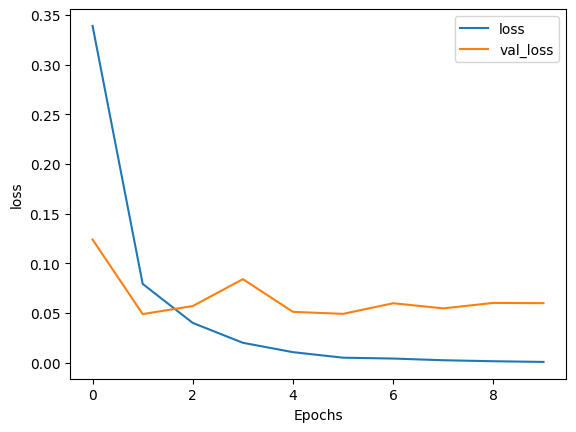

In [39]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [40]:
# Define a new mail to test
new_mail = ["Congratulations! You've won a free vacation. Claim your prize now!"]

# Preprocess the new mail
new_sequences = tokenizer.texts_to_sequences(new_mail)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Make predictions on the new mail
predictions = model.predict(new_padded)

# Convert predictions to labels
predicted_labels = ['spam' if pred >= 0.5 else 'ham' for pred in predictions]

# Print the predicted label
print("Predicted Label:", predicted_labels[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicted Label: spam


In [41]:
# Define a new mail to test
new_mail = ["Hi John, just checking in to see if you received my email from yesterday?"]

# Preprocess the new mail
new_sequences = tokenizer.texts_to_sequences(new_mail)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Make predictions on the new mail
predictions = model.predict(new_padded)

# Convert predictions to labels
predicted_labels = ['spam' if pred >= 0.5 else 'ham' for pred in predictions]

# Print the predicted label
print("Predicted Label:", predicted_labels[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label: ham
